# First and Second Question
**Course:** Transport innovation for a sustainable, inclusive and smart mobility

**Professor:** Cristina Pronello

**Students:** Amir Yarmohammadi (S329783), Saeideh Mohammadikish (S329781)

In [2]:
#classtraining
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt

### Reading the file

In [3]:
# Use r strings for file names to avoid problems caused by escape characters
filename = r'/Users/amiryarmohamadi/Academic/Polito/Transport innovation for a sustainable, inclusive and smart mobility/Projects/Data Exercises/Data/Shared_Micromobility_Vehicle_Trips_Austin[1].csv'
print(filename)
# Skipping bad lines - better approach is to not skip lines 
#-open csv file and see if wrong data can be fixed.
df2 = pd.read_csv(filename, on_bad_lines ='warn', sep=';')
print(df2.shape)

/Users/amiryarmohamadi/Academic/Polito/Transport innovation for a sustainable, inclusive and smart mobility/Projects/Data Exercises/Data/Shared_Micromobility_Vehicle_Trips_Austin[1].csv
(514767, 18)


In [5]:
bad_line_count = 0
data = []
good_data = []
counter = 0

with open('/Users/amiryarmohamadi/Academic/Polito/Transport innovation for a sustainable, inclusive and smart mobility/Projects/Data Exercises/Data/error.csv', 'w') as error:
    with open('/Users/amiryarmohamadi/Academic/Polito/Transport innovation for a sustainable, inclusive and smart mobility/Projects/Data Exercises/Data/Shared_Micromobility_Vehicle_Trips_Austin[1].csv', 'r') as file:
        for line in file:
            if counter != 514767:
                data = line.strip().split(';')
                if len(data) != 18: 
                    print(data)
                    error.write(';'.join(data) + '\n')
                    bad_line_count += 1
                else:
                    if data[2] != 'Vehicle Type':
                        good_data.append(data)
                counter += 1

df = pd.DataFrame(good_data, columns=['ID', 'Device ID', 'Vehicle Type', 'Trip Duration', 'Trip Distance', 'Start Time', 'End Time',
                                      'Modified Date', 'Month', 'Hour', 'Day of Week', 'Council District (Start)', 'Council District (End)',
                                      'Year', 'Census Tract Start', 'Census Tract End', 'Start Time (US/Central)', 'End Time (US/Central)'])
print(f"DataFrame shape: {df.shape}")
print(f"Number of bad lines: {bad_line_count}")


['379ed6cf-650d-4694-9c83-b8289b49c482', '106520be-fe13-497{']
['"error" : true,']
['"message" : "Internal error",']
['"status" : 500']
DataFrame shape: (514762, 18)
Number of bad lines: 4


### Data cleaning

In [12]:
#Missing Values
df.replace("", pd.NA, inplace=True)
df.replace(["NULL", "NaN", "none", "None"], pd.NA, inplace=True)
print(df.isnull().sum())

ID                             0
Device ID                      0
Vehicle Type                   0
Trip Duration                  0
Trip Distance                  0
Start Time                     0
End Time                       0
Modified Date                  0
Month                          0
Hour                           0
Day of Week                    0
Council District (Start)    1099
Council District (End)      1161
Year                           0
Census Tract Start          1054
Census Tract End            1051
Start Time (US/Central)      660
End Time (US/Central)        660
dtype: int64


In [13]:
# Data Types
print(df.dtypes)

ID                          object
Device ID                   object
Vehicle Type                object
Trip Duration               object
Trip Distance               object
Start Time                  object
End Time                    object
Modified Date               object
Month                       object
Hour                        object
Day of Week                 object
Council District (Start)    object
Council District (End)      object
Year                        object
Census Tract Start          object
Census Tract End            object
Start Time (US/Central)     object
End Time (US/Central)       object
dtype: object


In [14]:
df.head(5)

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Start Time (US/Central),End Time (US/Central)
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,"2,184","4,254.483964627391",11/02/2021 12:45:00 AM,11/02/2021 01:15:00 AM,11/03/2021 03:16:12 AM,11,1,1,9,9,"2,021",48453001100,48453001100,11/01/2021 07:45:00 PM,11/01/2021 08:15:00 PM
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705,"2,670.868099468422",11/02/2021 01:30:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:12 AM,11,1,1,3,9,"2,021",48453000902,48453001100,11/01/2021 08:30:00 PM,11/01/2021 08:30:00 PM
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189,258.93874414083393,11/02/2021 01:15:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:10 AM,11,1,1,1,1,"2,021",48453001100,48453001100,11/01/2021 08:15:00 PM,11/01/2021 08:30:00 PM
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203,354.08819384429376,11/02/2021 01:30:00 AM,11/02/2021 01:30:00 AM,11/03/2021 03:16:11 AM,11,1,1,1,9,"2,021",48453001100,48453001100,11/01/2021 08:30:00 PM,11/01/2021 08:30:00 PM
4,258bea73-5b14-4970-950e-1a1a7c3d715f,b748cae7-7f46-48a7-834d-980565210bf6,scooter,166,757,01/30/2022 05:45:00 PM,01/30/2022 05:45:00 PM,02/08/2022 03:12:27 AM,1,17,6,9,9,"2,022",48453000604,48453000603,01/30/2022 11:45:00 AM,01/30/2022 11:45:00 AM


In [15]:
#changing to string
df['Trip Duration'] = df['Trip Duration'].astype(str)
df['Trip Distance'] = df['Trip Distance'].astype(str)
df['Start Time'] = df['Start Time'].astype(str)
df['End Time'] = df['End Time'].astype(str)
df['Modified Date'] = df['Modified Date'].astype(str)
df['Hour'] = df['Hour'].astype(str)
df['Month'] = df['Month'].astype(str)
df['Year'] = df['Year'].astype(str)
df['Day of Week'] = df['Day of Week'].astype(str)
df['Start Time (US/Central)'] = df['Start Time (US/Central)'].astype(str)
df['End Time (US/Central)'] = df['End Time (US/Central)'].astype(str)

# removing extra characters
df['Trip Duration'] = df['Trip Duration'].str.strip()
df['Trip Distance'] = df['Trip Distance'].str.strip()
df['Start Time'] = df['Start Time'].str.strip()
df['End Time'] = df['Start Time'].str.strip()
df['Modified Date'] = df['Modified Date'].str.strip()
df['Start Time (US/Central)'] = df['Start Time (US/Central)'].str.strip()
df['End Time (US/Central)'] = df['End Time (US/Central)'].str.strip()

#changing to int & float
df['Year'] = df['Year'].str.replace(',', '').astype(int)
df['Trip Duration'] = df['Trip Duration'].str.replace(',', '').astype(int)
df['Trip Distance'] = df['Trip Distance'].str.replace(',', '').astype(float)

# format to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['End Time'] = pd.to_datetime(df['End Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Modified Date'] = pd.to_datetime(df['Modified Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Start Time (US/Central)'] = pd.to_datetime(df['Start Time (US/Central)'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['End Time (US/Central)'] = pd.to_datetime(df['End Time (US/Central)'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


#converting None to 0
# Replace "None" and any other non-numeric entries with a default value (e.g., 0)
# Ensure no NaN values exist in the column before converting
df["Council District (Start)"] = df["Council District (Start)"].replace(["None", None], 0)
df["Council District (Start)"] = pd.to_numeric(df["Council District (Start)"], errors='coerce').fillna(0).astype('int')

df["Council District (End)"] = df["Council District (End)"].replace(["None", None], 0)
df["Council District (End)"] = pd.to_numeric(df["Council District (End)"], errors='coerce').fillna(0).astype('int')



In [16]:
df.head(5)

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End,Start Time (US/Central),End Time (US/Central)
0,5a23a573-418b-443b-8dc8-d7963fe2b063,5cee599e-832c-4fa5-9050-dcc00e3790f3,scooter,2184,4254.483965,2021-11-02 00:45:00,2021-11-02 00:45:00,2021-11-03 03:16:12,11,1,1,9,9,2021,48453001100,48453001100,2021-11-01 19:45:00,2021-11-01 20:15:00
1,dac12ecc-0f79-4faa-a626-674a7c9f3df2,20014eea-19b2-4643-b3b3-63c31e76e57b,scooter,705,2670.868099,2021-11-02 01:30:00,2021-11-02 01:30:00,2021-11-03 03:16:12,11,1,1,3,9,2021,48453000902,48453001100,2021-11-01 20:30:00,2021-11-01 20:30:00
2,d6bdc5e8-dec0-4917-ab4f-5b848f61dc5e,2cad7083-7af6-4b22-8540-9b9dfffc2f58,scooter,189,258.938744,2021-11-02 01:15:00,2021-11-02 01:15:00,2021-11-03 03:16:10,11,1,1,1,1,2021,48453001100,48453001100,2021-11-01 20:15:00,2021-11-01 20:30:00
3,3b17953e-9d9c-4d27-b5ac-ad76eaac2fbb,fde91af9-deb8-41cc-9ddc-472ff7653d90,scooter,203,354.088194,2021-11-02 01:30:00,2021-11-02 01:30:00,2021-11-03 03:16:11,11,1,1,1,9,2021,48453001100,48453001100,2021-11-01 20:30:00,2021-11-01 20:30:00
4,258bea73-5b14-4970-950e-1a1a7c3d715f,b748cae7-7f46-48a7-834d-980565210bf6,scooter,166,757.000000,2022-01-30 17:45:00,2022-01-30 17:45:00,2022-02-08 03:12:27,1,17,6,9,9,2022,48453000604,48453000603,2022-01-30 11:45:00,2022-01-30 11:45:00


In [20]:
columns = df.columns
print("Columns:", columns)

Columns: Index(['ID', 'Device ID', 'Vehicle Type', 'Trip Duration', 'Trip Distance',
       'Start Time', 'End Time', 'Modified Date', 'Month', 'Hour',
       'Day of Week', 'Council District (Start)', 'Council District (End)',
       'Year', 'Census Tract Start', 'Census Tract End',
       'Start Time (US/Central)', 'End Time (US/Central)'],
      dtype='object')


### Are the values in each column consistent with your expectations?

In [25]:

print(df['Trip Duration'].describe())
print(df['Trip Distance'].describe())
print(df['Start Time'].describe())
print(df['End Time'].describe())
print('***Is end time after start time?***')
inconsistent_times = df[df['Start Time'] > df['End Time']]
if inconsistent_times.empty:
    print("YES, Its Ok")
else:
    print(inconsistent_times)

count    514762.000000
mean        678.592280
std        2917.778137
min           0.000000
25%         234.000000
50%         428.000000
75%         783.000000
max      693899.000000
Name: Trip Duration, dtype: float64
count    5.147620e+05
mean     1.735178e+03
std      2.537801e+04
min      0.000000e+00
25%      5.260000e+02
50%      1.136000e+03
75%      2.108000e+03
max      1.154537e+07
Name: Trip Distance, dtype: float64
count                           514762
mean     2021-09-21 01:14:58.048807424
min                2021-08-19 05:30:00
25%                2021-08-28 23:30:00
50%                2021-09-06 00:45:00
75%                2021-09-23 03:30:00
max                2022-03-25 01:00:00
Name: Start Time, dtype: object
count                           514762
mean     2021-09-21 01:14:58.048807424
min                2021-08-19 05:30:00
25%                2021-08-28 23:30:00
50%                2021-09-06 00:45:00
75%                2021-09-23 03:30:00
max                2022-03-25

In [27]:
df = df[(df['Trip Duration'] != 0) & (df['Trip Distance'] != 0)]
print(df.shape)

(498528, 18)


In [29]:
#available Districts Vs recorded Districts
print(df['Council District (Start)'].unique())
print(df['Council District (End)'].unique())

[ 9  3  1  5  7  8  0 10  2  4]
[ 9  1  8  5  3  4  0 10  2  7  6]


In [31]:
#duplicate rows
print(df.duplicated().sum())

0


In [33]:
#duplicate rows
print(df.duplicated("ID").sum())

0


In [35]:
# **** detecting Outliers ****
# using IQR and Z-Score
select = 'Trip Distance'

#  IQR
Q1 = df[select].quantile(0.25)
Q3 = df[select].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr = df[(df[select] < lower_bound_iqr) | (df[select] > upper_bound_iqr)]

#  Z-Score
mean = df[select].mean()
std = df[select].std()
df['Z-Score'] = (df[select] - mean) / std

#  Z-Score (with a threshold of 3 or 2.5)
z_threshold = 3
outliers_zscore = df[(df['Z-Score'] > z_threshold) | (df['Z-Score'] < -z_threshold)]

# common rows 
common_outliers = outliers_iqr[outliers_iqr['ID'].isin(outliers_zscore['ID'])]

print(f"Common Outliers between IQR and Z-Score: {len(common_outliers)} rows")
print(common_outliers)

Common Outliers between IQR and Z-Score: 54 rows
                                          ID  \
20380   a78b44b4-8849-4b1b-89a6-5c3b33085f69   
31379   ebe4af4d-2595-4492-8e0d-bd11c84e1a50   
74791   13c78a92-e603-4ccf-b915-f5fb744e4ef5   
78065   fe3ed5bb-e63a-4f2f-82ed-1f44f6f4a6d2   
80070   35774856-d3d3-4bf9-b0ff-fc24dbcbe9c3   
84596   6a0f26c8-1be6-4889-a64c-8b241f688e48   
87847   32e63173-f78d-41b1-9da3-2eae210af74c   
87856   e1bed129-55fc-4662-ab73-2abc7c695492   
98717   d85f492a-73bf-4f7a-9454-d73210e63d9e   
102824  b19cdd3b-bce1-4683-9a9d-2588b4afc2dc   
103212  9dde2231-34d8-4fe3-bbe5-a26e35d1be05   
104859  f0932029-d1f2-4035-9ed4-16df75b6701a   
121844  dec997f5-fd47-4465-b4df-d4c873608248   
123661  aa2e26a1-b62a-4776-b642-78be11125750   
128762  587fb28a-cf46-49f4-9fd4-64559667c0af   
129781  f3771b6c-3472-4e11-86da-879497d1e723   
130148  3a147ecb-ff28-4020-b576-64cc5f740ac0   
131458  174e5c76-c2c2-4341-867f-ae41bde023a7   
188631  cd012804-af61-4bac-9120-3873c5f

In [37]:
common_outliers.to_csv("OutlierRows.csv", index=False)
# Removing outliers
df_cleaned = df[~df['ID'].isin(common_outliers['ID'])]

print(f"Common Outliers between IQR and Z-Score: {len(common_outliers)} rows")
print(f"Data after removing outliers: {len(df_cleaned)} rows")

Common Outliers between IQR and Z-Score: 54 rows
Data after removing outliers: 498474 rows


In [39]:
# **** detecting Outliers ****
# using IQR and Z-Score
select = 'Trip Duration'

#  IQR
Q1 = df[select].quantile(0.25)
Q3 = df[select].quantile(0.75)
IQR = Q3 - Q1
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR
outliers_iqr = df[(df[select] < lower_bound_iqr) | (df[select] > upper_bound_iqr)]

#  Z-Score
mean = df[select].mean()
std = df[select].std()
df['Z-Score'] = (df[select] - mean) / std

## Z-Score (with threshold of 3 or 2.5)
z_threshold = 3
outliers_zscore = df[(df['Z-Score'] > z_threshold) | (df['Z-Score'] < -z_threshold)]

# common rows 
common_outliers = outliers_iqr[outliers_iqr['ID'].isin(outliers_zscore['ID'])]

print(f"Common Outliers between IQR and Z-Score: {len(common_outliers)} rows")
print(common_outliers)

Common Outliers between IQR and Z-Score: 172 rows
                                          ID  \
2424    c5139231-8eb5-4990-b37b-6a368c6f5e3a   
4677    5c8060ad-4c3d-43f8-9f44-4000d4e7c1b1   
4739    93ad2621-e542-4d79-94fe-9626ed1cdeb5   
8354    1c6fbf9b-c8c1-47e5-966e-1b09497cfcfb   
9676    7df51153-9258-4d22-b9ba-0365d5931899   
...                                      ...   
506083  1d5c10ec-50ab-4c7d-8e5a-a85281b0f12a   
506256  a9c4e012-9f9b-4619-9912-dc40c1ac347a   
506961  667c68fa-7b25-40ca-abc7-ac8f36464d7c   
507601  d8710bad-2ce4-4410-81a2-85be47e4274a   
514591  0ff1ac9b-643b-442f-a0a8-4a6dc4dad0dd   

                                   Device ID Vehicle Type  Trip Duration  \
2424    ad280101-c80d-4967-84df-2935bdd0a892      scooter          11177   
4677    e7c75f48-817e-4488-9412-f3f0f501724c      scooter         348282   
4739    37b4d28e-1b0a-42cf-b834-39117823d8af      scooter          10801   
8354    17f248a1-ad2d-4e79-94e0-d279c5dfbde7      scooter          11

In [41]:
common_outliers.to_csv("OutlierRows.csv", index=False)

df_cleaned = df[~df['ID'].isin(common_outliers['ID'])]

print(f"Common Outliers between IQR and Z-Score: {len(common_outliers)} rows")
print(f"Data after removing outliers: {len(df_cleaned)} rows")

Common Outliers between IQR and Z-Score: 172 rows
Data after removing outliers: 498356 rows


In [43]:
V_group_distance = df.groupby("Vehicle Type", as_index =False)["Trip Distance"].mean()
V_group_distance

,Vehicle Type,Trip Distance
0,bicycle,2291.453625
1,car,7595.434783
2,moped,1036.248239
3,scooter,1779.354672


In [45]:
V_group_duration = df.groupby("Vehicle Type")["Trip Duration"].mean()/60  #min *****ATTENTION*******
V_group_duration

Vehicle Type
bicycle    13.428773
car        75.989130
moped       8.541227
scooter    11.499752
Name: Trip Duration, dtype: float64

Vehicle Type
bicycle      7601
car           460
moped         568
scooter    489899
dtype: int64


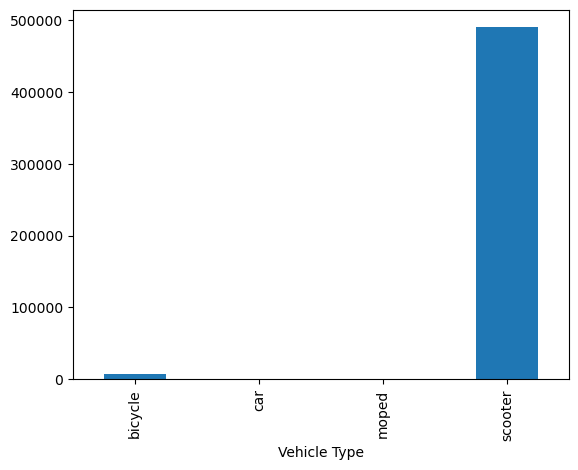

In [47]:
V_Type = df.groupby('Vehicle Type').size()
print(V_Type)
V_Type_Plot = V_Type.plot(kind="bar", x = 'Vehicle Type' , y = "Count")

In [49]:
# Filter the dataframe to exclude 'car' and 'moped'
print(f"DataFrame shape Before omiting Cars and Mopeds: {df.shape}")
NoCarMoped_df = df[~df['Vehicle Type'].isin(['car', 'moped', 'bicycle'])]
print(f"DataFrame shape: {NoCarMoped_df.shape}")

DataFrame shape Before omiting Cars and Mopeds: (498528, 19)
DataFrame shape: (489899, 19)


In [51]:
#List of available months for each year
months_per_year = df.groupby('Year')['Month'].unique()
print("Months available for each year:")
print(months_per_year)

Months available for each year:
Year
2021    [11, 12, 10, 9, 8]
2022             [1, 2, 3]
Name: Month, dtype: object


   Month    size
0      1    6229
4      2    7598
5      3    1607
6      8  156726
7      9  225059
1     10   40957
2     11   26250
3     12   25473


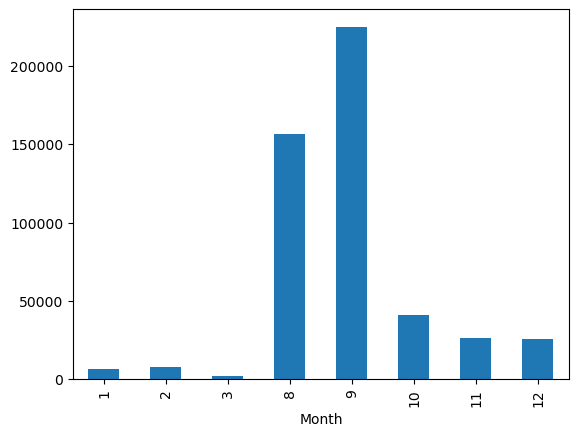

In [53]:
# number of trips for each month
Month_freq = NoCarMoped_df.groupby('Month', as_index=False).size()
Month_freq['Month'] = Month_freq['Month'].astype(int)
Month_freq = Month_freq.sort_values(by='Month', ascending=True)
print(Month_freq)
Month_freq_Plot = Month_freq.plot(kind="bar", x='Month', y='size', legend=False)

    Hour   size
0      0  36618
1      1  34056
2      2  30430
3      3  31731
4      4  28883
5      5  23186
6      6  18807
7      7  17599
8      8   6866
9      9   2782
10    10   1958
11    11   2306
12    12   4276
13    13   7323
14    14  10658
15    15  13906
16    16  18927
17    17  24976
18    18  26825
19    19  28055
20    20  28193
21    21  28055
22    22  30178
23    23  33305


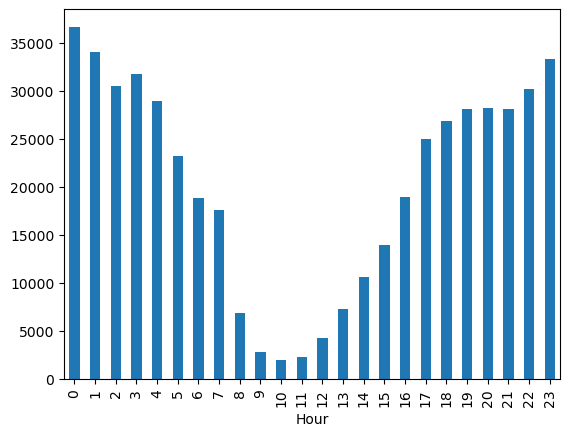

In [49]:
# number of trips for each hour
NoCarMoped_df.loc[:, 'Hour'] = pd.to_numeric(NoCarMoped_df['Hour'], errors='coerce')
Hour_freq = NoCarMoped_df.groupby('Hour', as_index=False).size()
Hour_freq = Hour_freq.sort_values(by='Hour', ascending=True)
print(Hour_freq)
Hour_freq_Plot = Hour_freq.plot(kind="bar", x='Hour', y='size', legend=False)

  Day of Week   size
0           0  73119
1           1  49970
2           2  46365
3           3  59714
4           4  65382
5           5  98514
6           6  96835


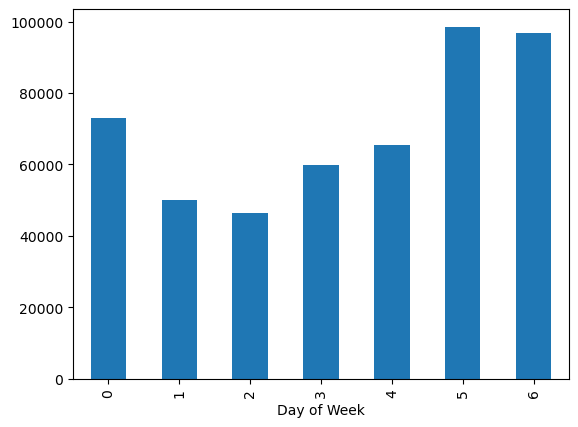

In [51]:
# number of trips for each Day of Week
DayofWeek_freq = NoCarMoped_df.groupby('Day of Week', as_index=False).size()
DayofWeek_freq = DayofWeek_freq.sort_values(by='Day of Week', ascending=True)
print(DayofWeek_freq)
DayofWeek_freq_Plot = DayofWeek_freq.plot(kind="bar", x='Day of Week', y='size', legend=False)

In [53]:
# the number of unic vehicles used 
unique_vehicles = NoCarMoped_df.groupby(['Year'], as_index=False)['Device ID'].nunique().reset_index()
unique_vehicles

,index,Year,Device ID
0,0,2021,24782
1,1,2022,7256


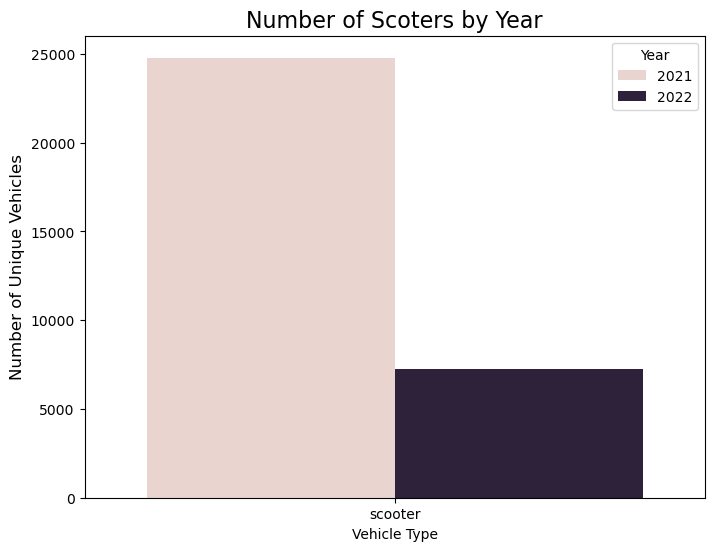

In [55]:
# Ensure data has the required columns
unique_vehicles = NoCarMoped_df.groupby(['Year', 'Vehicle Type'], as_index=False)['Device ID'].nunique()

# Create the plot
plt.figure(figsize=(8, 6))
sns.barplot(data=unique_vehicles, x='Vehicle Type', y='Device ID', hue='Year', dodge=True)

# Add titles and labels
plt.title('Number of Scoters by Year', fontsize=16)
plt.ylabel('Number of Unique Vehicles', fontsize=12)
plt.legend(title='Year', fontsize=10)
plt.show()

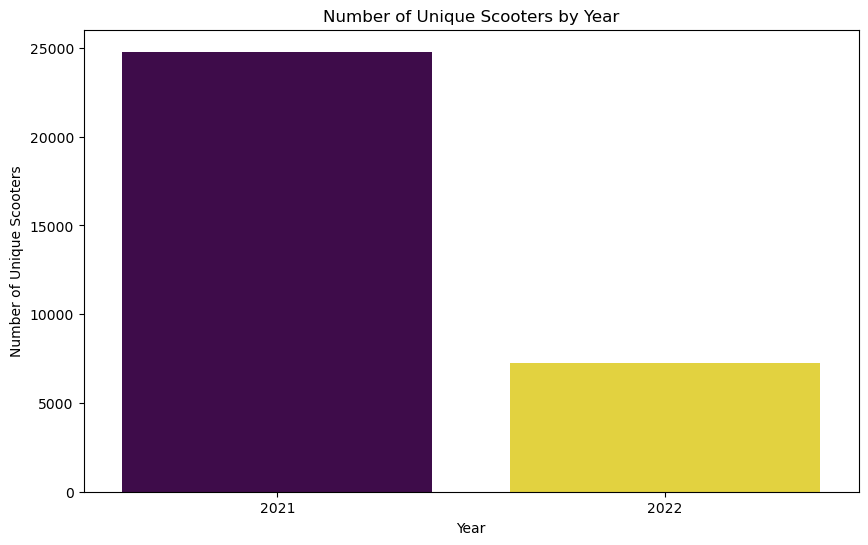

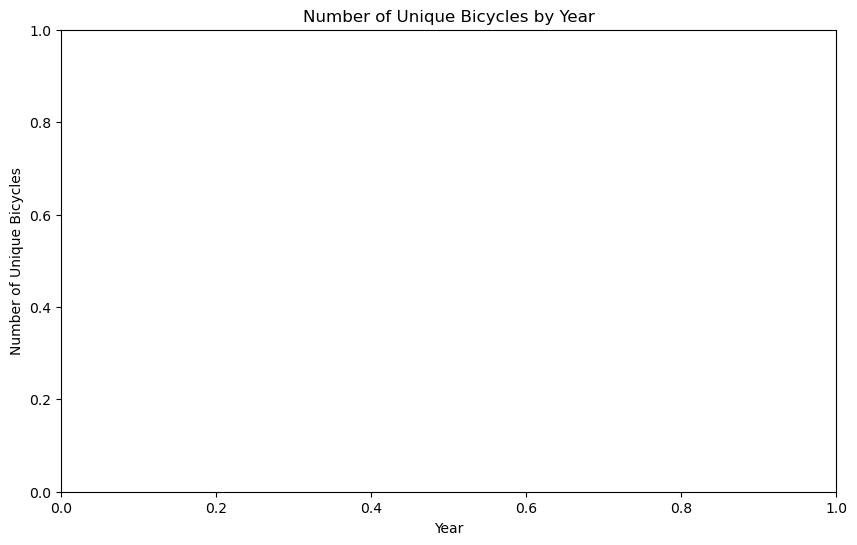

In [57]:
scooter_data = unique_vehicles[unique_vehicles['Vehicle Type'] == 'scooter']
bicycle_data = unique_vehicles[unique_vehicles['Vehicle Type'] == 'bicycle']

# scooter
plt.figure(figsize=(10, 6))
sns.barplot(data=scooter_data, x='Year', y='Device ID', hue='Year', dodge=False, palette='viridis', legend=False)
plt.title('Number of Unique Scooters by Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Scooters')
plt.show()

# bicycle
plt.figure(figsize=(10, 6))
sns.barplot(data=bicycle_data, x='Year', y='Device ID', hue='Year', dodge=False, palette='plasma', legend=False)
plt.title('Number of Unique Bicycles by Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Bicycles')
plt.show()

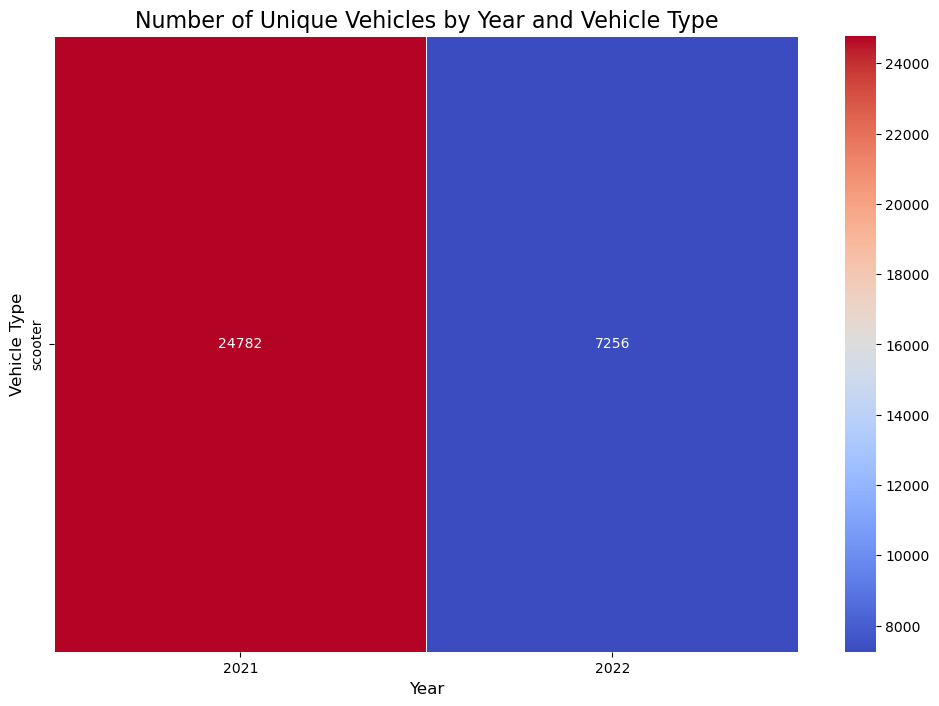

In [59]:
# Pivot the data to create a matrix suitable for the heatmap
heatmap_data = unique_vehicles.pivot(index='Vehicle Type', columns='Year', values='Device ID')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)

# Titles and labels
plt.title('Number of Unique Vehicles by Year and Vehicle Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Vehicle Type', fontsize=12)

# Display the heatmap
plt.show()


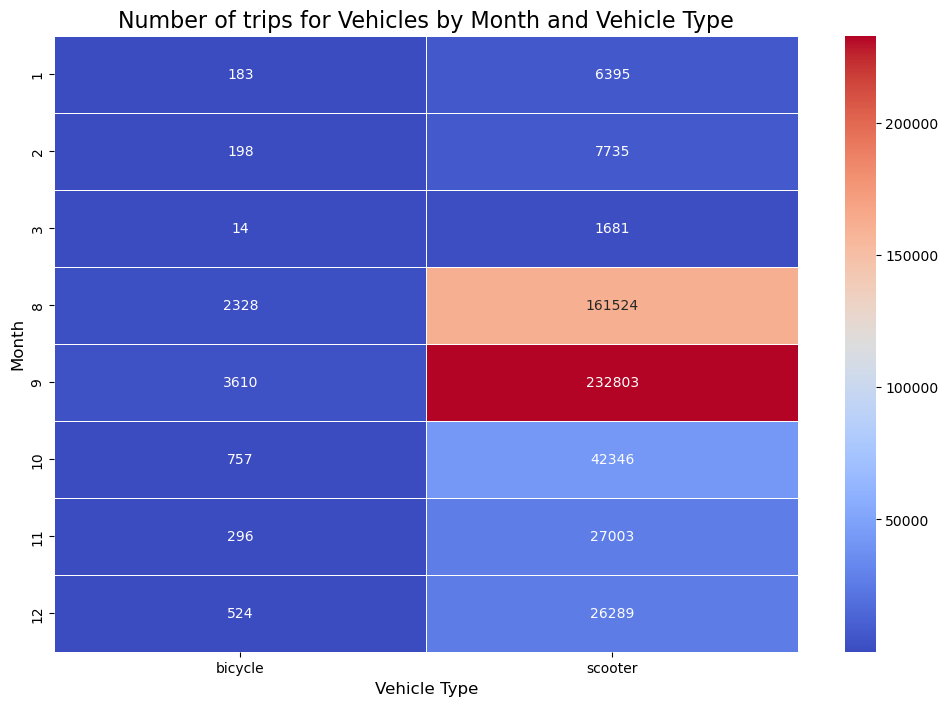

In [190]:
# Group by 'Vehicle Type', 'Year', and 'Month' and count the number of trips
total_trips = df.groupby(['Vehicle Type', 'Year', 'Month'], as_index=False).size()
total_trips = total_trips.rename(columns={'size': 'Total Trips'})

# Filter for bicycles and scooters only
bicycle_scooter_data = total_trips[(total_trips['Vehicle Type'] == 'bicycle') | (total_trips['Vehicle Type'] == 'scooter')]

# Pivot the data to create a matrix suitable for the heatmap
heatmap_data_months = bicycle_scooter_data.pivot(index='Month', columns='Vehicle Type', values='Total Trips')

# Ensure the index is sorted numerically
heatmap_data_months.index = pd.to_numeric(heatmap_data_months.index, errors='coerce')
heatmap_data_months = heatmap_data_months.sort_index()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_months, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)

# Titles and labels
plt.title('Number of trips for Vehicles by Month and Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Display the heatmap
plt.show()

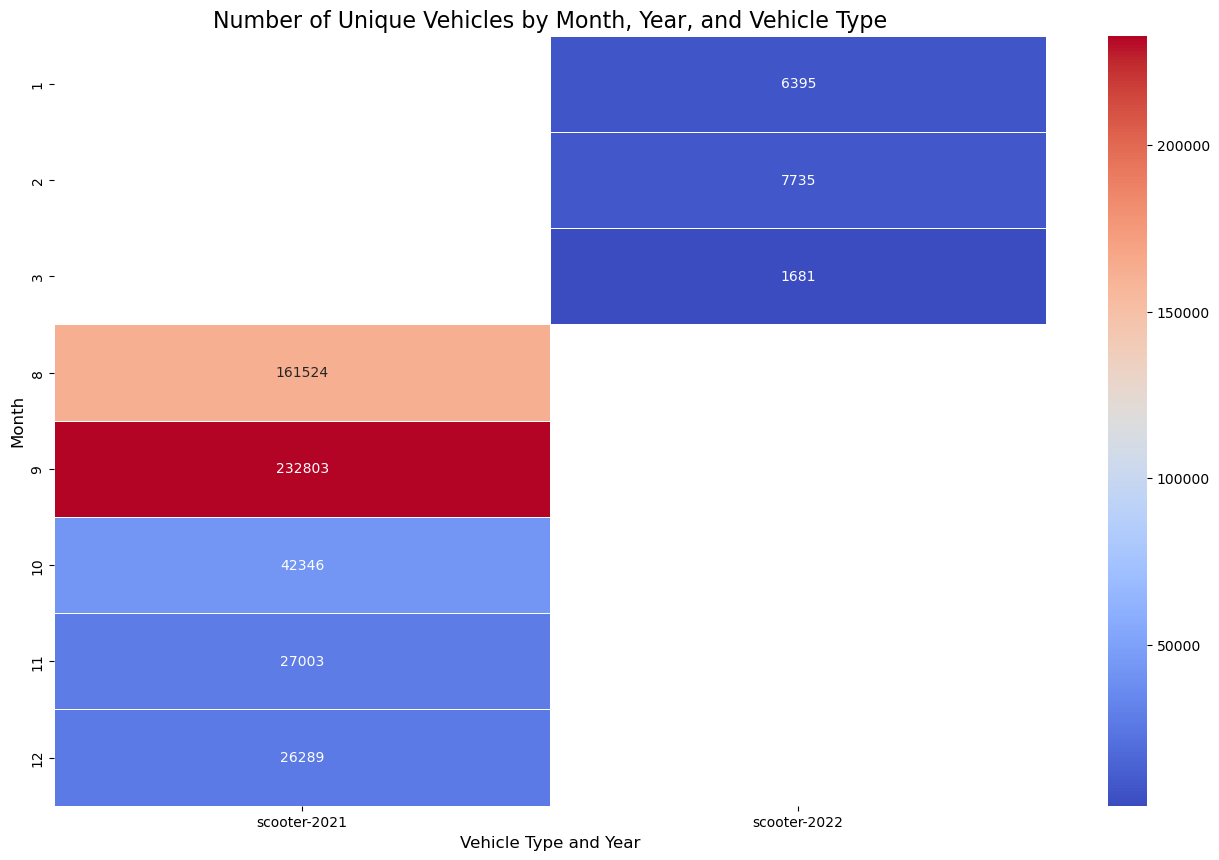

In [178]:
# Group by 'Vehicle Type', 'Year', and 'Month' and count the number of trips
vehicles_by_month_year = df.groupby(['Vehicle Type', 'Year', 'Month'], as_index=False).size()
vehicles_by_month_year = vehicles_by_month_year.rename(columns={'size': 'Total Trips'})

# Filter for scooters only
vehicles_by_month_year = vehicles_by_month_year[vehicles_by_month_year['Vehicle Type'] == 'scooter']

# Pivot the data to create a matrix suitable for the heatmap
heatmap_data_months_years = vehicles_by_month_year.pivot_table(
    index='Month', columns=['Vehicle Type', 'Year'], values='Total Trips'
)

# Ensure the index (Month) is sorted numerically
heatmap_data_months_years.index = pd.to_numeric(heatmap_data_months_years.index, errors='coerce')
heatmap_data_months_years = heatmap_data_months_years.sort_index()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data_months_years, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)

# Titles and labels
plt.title('Number of Unique Vehicles by Month, Year, and Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type and Year', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Display the heatmap
plt.show()


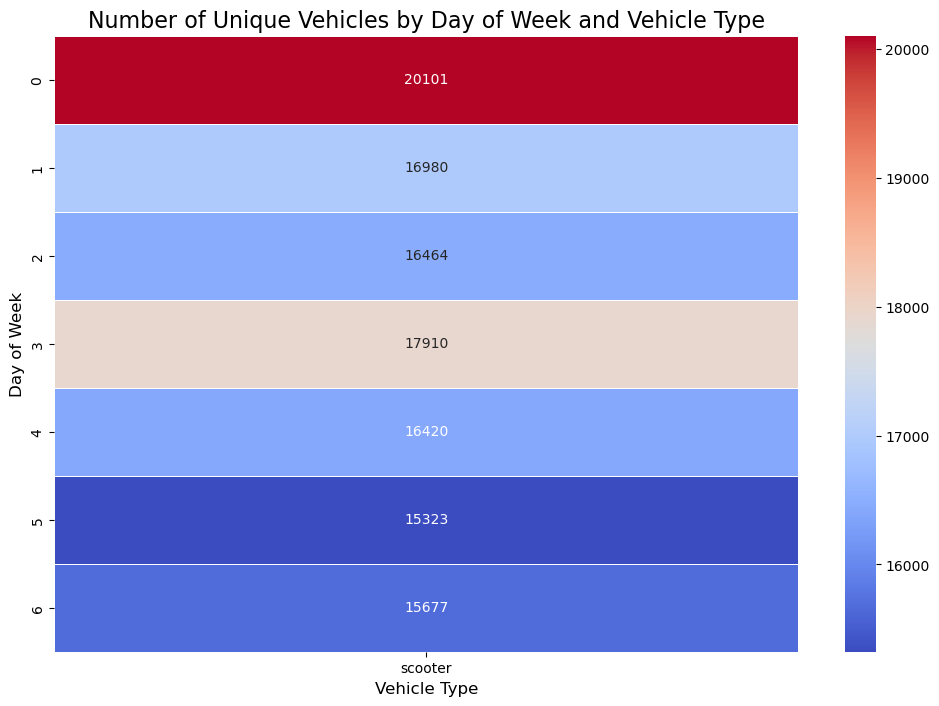

In [65]:
# Group by 'Vehicle Type', and 'Month' and calculate unique devices
unique_vehicles_by_month = NoCarMoped_df.groupby(['Vehicle Type', 'Day of Week'], as_index=False)['Device ID'].nunique()
# Pivot the data to create a matrix suitable for the heatmap
heatmap_data_months = unique_vehicles_by_month.pivot(index='Day of Week', columns='Vehicle Type', values='Device ID')

# Ensure the index is sorted numerically
heatmap_data_months.index = pd.to_numeric(heatmap_data_months.index, errors='coerce')
heatmap_data_months = heatmap_data_months.sort_index()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_months, annot=True, cmap='coolwarm', fmt='g', linewidths=0.5)

# Titles and labels
plt.title('Number of Unique Vehicles by Day of Week and Vehicle Type', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)

# Display the heatmap
plt.show()

In [67]:
# Group by 'Vehicle Type', 'Year', and 'Day of Week' and calculate the number of unique 'Device ID's
unique_vehicles = df.groupby(['Vehicle Type', 'Year', 'Day of Week'], as_index=False)['Device ID'].nunique().reset_index()

# Filter for Vehicle Type = 'bicycle'
bicycle_data = unique_vehicles[unique_vehicles['Vehicle Type'] == 'bicycle']

# Display the filtered data
print(bicycle_data)

    index Vehicle Type  Year Day of Week  Device ID
0       0      bicycle  2021           0        369
1       1      bicycle  2021           1        402
2       2      bicycle  2021           2        337
3       3      bicycle  2021           3        406
4       4      bicycle  2021           4        324
5       5      bicycle  2021           5        307
6       6      bicycle  2021           6        333
7       7      bicycle  2022           0         72
8       8      bicycle  2022           1         48
9       9      bicycle  2022           2         85
10     10      bicycle  2022           3          2
11     11      bicycle  2022           5         12
12     12      bicycle  2022           6         14


/var/folders/86/mkq30cmj4bs9p9s0krywz4fr0000gn/T/ipykernel_2898/1202663005.py:13: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=pivot_data, dashes=False, markers='o')


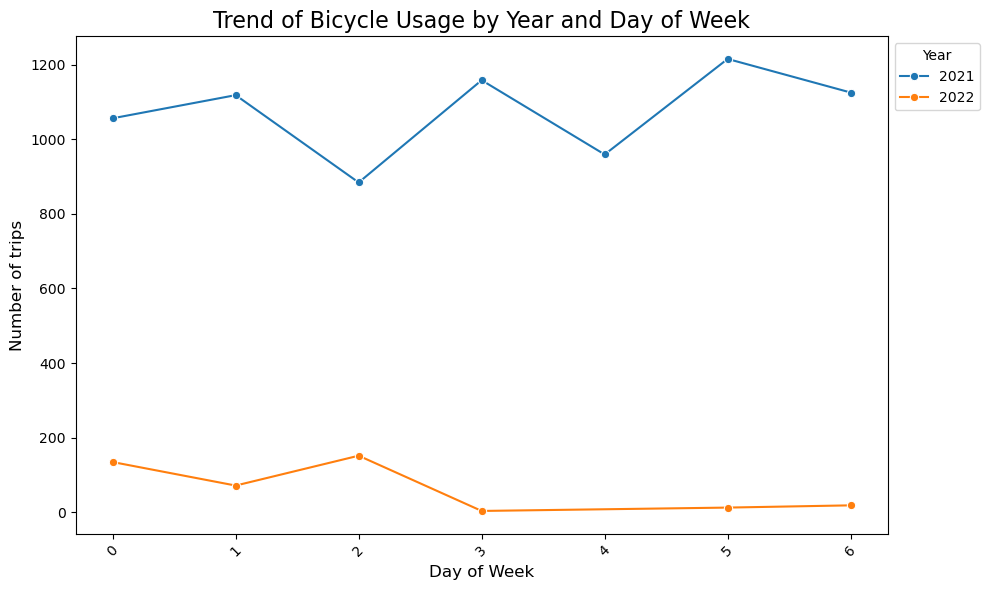

In [172]:
# Group by 'Vehicle Type', 'Year', and 'Day of Week' and count the number of trips
total_trips = df.groupby(['Vehicle Type', 'Year', 'Day of Week'], as_index=False).size()
total_trips = total_trips.rename(columns={'size': 'Total Trips'})

# Filter for bicycles only
bicycle_data = total_trips[total_trips['Vehicle Type'] == 'bicycle']

# Create pivot table
pivot_data = bicycle_data.pivot_table(index='Day of Week', columns='Year', values='Total Trips')

# Plot the trend using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_data, dashes=False, markers='o')

# Add titles and labels
plt.title('Trend of Bicycle Usage by Year and Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [71]:
unique_vehicles = df.groupby(['Vehicle Type', 'Year', 'Day of Week'], as_index=False)['Device ID'].nunique().reset_index()

# Filter for Vehicle Type = 'scooter'
Moped_data = unique_vehicles[unique_vehicles['Vehicle Type'] == 'scooter']
Moped_data

,index,Vehicle Type,Year,Day of Week,Device ID
31,31,scooter,2021,0,18241
32,32,scooter,2021,1,16029
33,33,scooter,2021,2,14059
34,34,scooter,2021,3,17638
35,35,scooter,2021,4,16361
36,36,scooter,2021,5,14577
37,37,scooter,2021,6,15247
38,38,scooter,2022,0,2634
39,39,scooter,2022,1,1810
40,40,scooter,2022,2,3323


/var/folders/86/mkq30cmj4bs9p9s0krywz4fr0000gn/T/ipykernel_2898/476425337.py:13: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=pivot_data, dashes=False, markers='o')


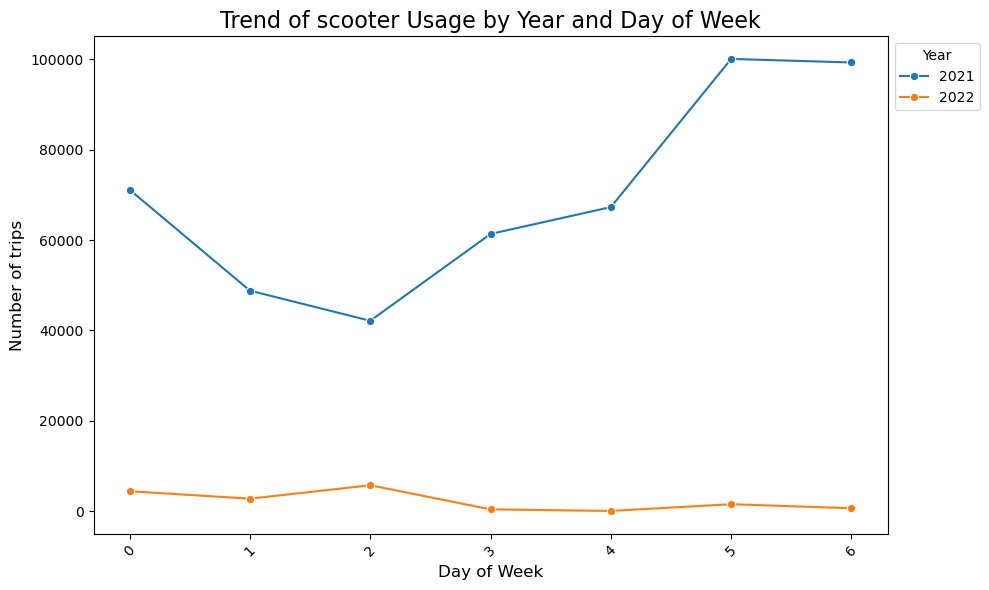

In [174]:

# Group by 'Vehicle Type', 'Year', and 'Day of Week' and count the number of trips
total_trips = df.groupby(['Vehicle Type', 'Year', 'Day of Week'], as_index=False).size()
total_trips = total_trips.rename(columns={'size': 'Total Trips'})

# Filter for bicycles only
bicycle_data = total_trips[total_trips['Vehicle Type'] == 'scooter']

# Create pivot table
pivot_data = bicycle_data.pivot_table(index='Day of Week', columns='Year', values='Total Trips')

# Plot the trend using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_data, dashes=False, markers='o')

# Add titles and labels
plt.title('Trend of scooter Usage by Year and Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of trips', fontsize=12)

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

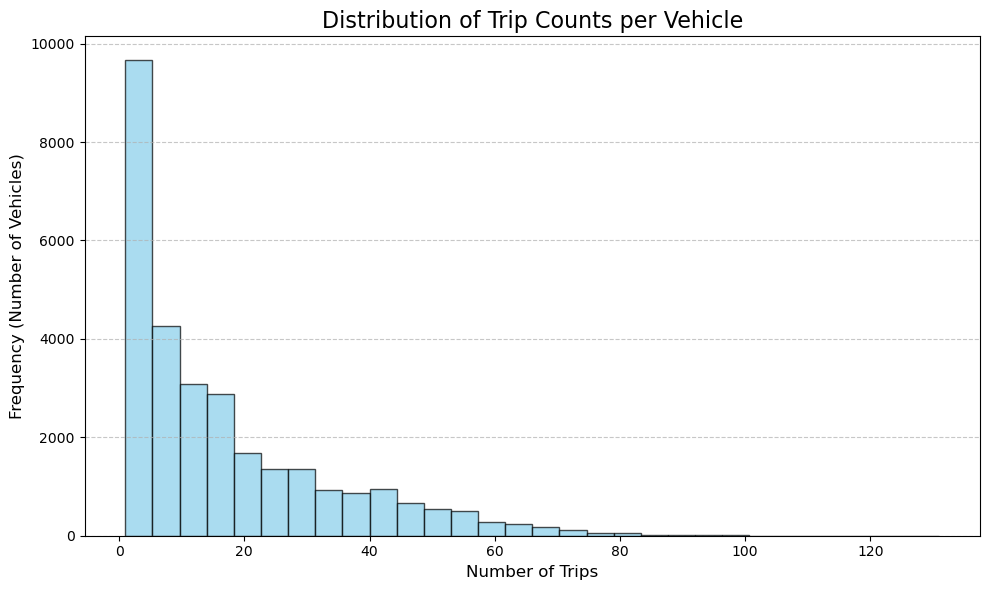

In [75]:
# Calculate the number of trips for each vehicle
vehicle_trip_counts = df.groupby('Device ID').size()

# Plot a histogram of the trip counts
plt.figure(figsize=(10, 6))
plt.hist(vehicle_trip_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Trip Counts per Vehicle', fontsize=16)
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Frequency (Number of Vehicles)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.tight_layout()
plt.show()


In [77]:
df.describe()

,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Council District (Start),Council District (End),Year,Start Time (US/Central),End Time (US/Central),Z-Score
count,498528.000000,4.985280e+05,498528,498528,498528,498528.000000,498528.000000,498528.000000,497899,497899,4.985280e+05
mean,695.117861,1.791683e+03,2021-09-21 01:40:02.807264256,2021-09-21 01:40:02.807264256,2021-09-22 06:56:43.506935552,7.560542,7.503546,2021.032656,2021-09-20 15:55:51.233282816,2021-09-20 16:07:24.639575040,-7.411464e-18
min,1.000000,7.082727e-01,2021-08-19 05:30:00,2021-08-19 05:30:00,2021-08-20 07:15:49,0.000000,0.000000,2021.000000,2021-08-19 00:30:00,2021-08-19 00:30:00,-2.375641e-01
25%,247.000000,5.850000e+02,2021-08-28 23:15:00,2021-08-28 23:15:00,2021-08-30 01:17:01,9.000000,9.000000,2021.000000,2021-08-28 18:00:00,2021-08-28 18:15:00,-1.533698e-01
50%,442.000000,1.180000e+03,2021-09-06 00:30:00,2021-09-06 00:30:00,2021-09-07 02:18:53,9.000000,9.000000,2021.000000,2021-09-05 19:30:00,2021-09-05 19:45:00,-8.663040e-02
75%,799.000000,2.153000e+03,2021-09-23 03:45:00,2021-09-23 03:45:00,2021-09-24 05:17:50,9.000000,9.000000,2021.000000,2021-09-22 21:45:00,2021-09-22 22:00:00,3.555399e-02
max,693899.000000,1.154537e+07,2022-03-25 01:00:00,2022-03-25 01:00:00,2022-03-26 02:30:18,10.000000,10.000000,2022.000000,2022-03-24 19:00:00,2022-03-24 19:15:00,2.372512e+02
std,2921.813407,2.578594e+04,NaN,NaN,NaN,2.690608,2.728973,0.177735,NaN,NaN,1.000000e+00


In [79]:
# Origin Distination Matrix calculation using pivot table

#The code builds an OD matrix by counting trips between council district pairs using pivot_table. 
#The index and columns specify start and end districts, while values="count" and aggfunc="count" tally trips. 
#Adding count=1 enables each trip to be counted. Other aggfunc options include "sum", "mean", "min", and custom functions.

OD_matrix1 = (
    NoCarMoped_df.assign(count=1)
    .pivot_table(index="Council District (Start)", columns="Council District (End)",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype(int)
).sort_values("Council District (Start)")

OD_matrix1

Council District (End),0,1,2,3,4,5,6,7,8,9,10
Council District (Start),,,,,,,,,,,
0,29,0,0,4,0,5,0,0,4,13,0
1,1,11245,1,3150,57,174,1,6,46,13781,26
2,2,1,282,107,0,21,0,0,0,5,0
3,4,3819,185,37797,14,706,0,2,74,20303,22
4,0,51,0,5,416,0,0,79,1,192,11
5,16,135,28,800,1,9109,0,1,727,7251,45
7,0,6,0,2,75,0,0,325,0,146,48
8,12,27,1,49,2,693,0,1,1081,919,29
9,48,14285,110,23428,356,7797,5,232,1314,325602,1034


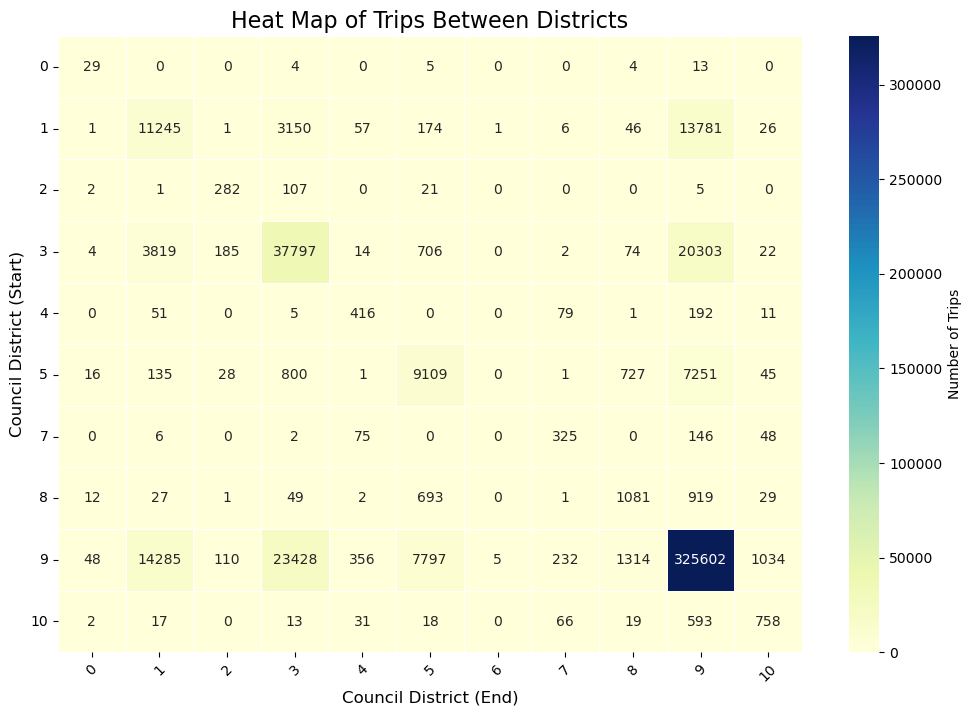

In [81]:
# Create the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(
    OD_matrix1,
    cmap="YlGnBu",  # Color palette
    annot=True,     # Show numbers in each cell
    fmt="d",        # Integer format for annotations
    linewidths=0.5, # Add gridlines
    cbar_kws={'label': 'Number of Trips'} # Add color bar label
)

# Add titles and labels
plt.title("Heat Map of Trips Between Districts", fontsize=16)
plt.xlabel("Council District (End)", fontsize=12)
plt.ylabel("Council District (Start)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()

In [93]:
# Origin Distination Matrix calculation using pivot table

#The code builds an OD matrix by counting trips between council district pairs using pivot_table. 
#The index and columns specify start and end districts, while values="count" and aggfunc="count" tally trips. 
#Adding count=1 enables each trip to be counted. Other aggfunc options include "sum", "mean", "min", and custom functions.

NoCarMoped_filtered = NoCarMoped_df[
    (NoCarMoped_df['Month'] == '9') & (NoCarMoped_df['Hour'] == 0)
]
OD_matrix = (
    NoCarMoped_filtered.assign(count=1)
    .pivot_table(index="Council District (Start)", columns="Council District (End)",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype(int)
).sort_values("Council District (Start)")

OD_matrix

Council District (End),0,1,2,3,4,5,7,8,9,10
Council District (Start),,,,,,,,,,
0,0,0,0,0,0,0,0,1,0,0
1,0,433,0,148,0,19,0,5,597,4
2,0,0,6,5,0,1,0,0,0,0
3,0,100,9,1302,0,8,0,0,766,0
4,0,1,0,0,9,0,4,1,3,0
5,0,9,0,24,0,400,0,29,297,1
7,0,0,0,0,2,0,7,0,7,0
8,0,1,0,2,0,43,0,64,34,0
9,2,471,0,771,11,307,4,30,11114,22


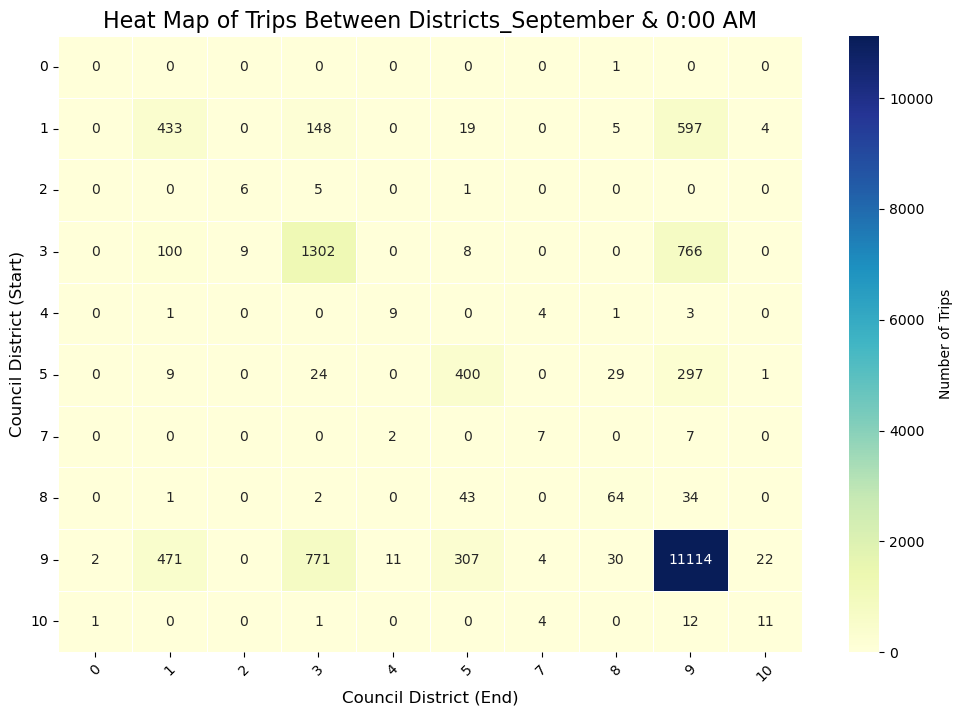

In [95]:
# Create the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(
    OD_matrix,
    cmap="YlGnBu",  # Color palette
    annot=True,     # Show numbers in each cell
    fmt="d",        # Integer format for annotations
    linewidths=0.5, # Add gridlines
    cbar_kws={'label': 'Number of Trips'} # Add color bar label
)

# Add titles and labels
plt.title("Heat Map of Trips Between Districts_September & 0:00 AM", fontsize=16)
plt.xlabel("Council District (End)", fontsize=12)
plt.ylabel("Council District (Start)", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()


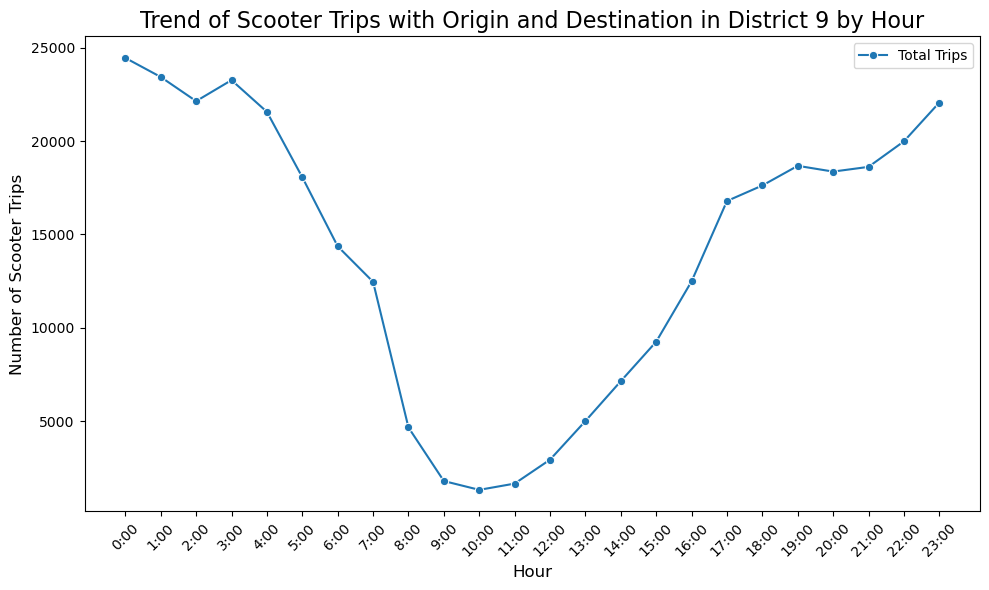

In [192]:
# Group by 'Vehicle Type', 'Hour', 'Council District (Start)', and 'Council District (End)'
# and count the number of trips
total_trips = df.groupby(['Vehicle Type', 'Hour', 'Council District (Start)', 'Council District (End)'], as_index=False).size().reset_index()
total_trips = total_trips.rename(columns={'size': 'Total Trips'})

# Filter for Vehicle Type = 'scooter' and Council District 9
scooter9_data = total_trips[(total_trips['Vehicle Type'] == 'scooter') & 
                             (total_trips['Council District (Start)'] == 9) & 
                             (total_trips['Council District (End)'] == 9)]

# Create the pivot table for plotting
pivot_data = scooter9_data.pivot_table(index='Hour', values='Total Trips', aggfunc='sum')

# Sort the data by hour
pivot_data.index = pd.to_numeric(pivot_data.index, errors='coerce')
pivot_data = pivot_data.sort_index()

# Plot the trend using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_data, dashes=False, markers='o')

# Add titles and labels
plt.title('Trend of Scooter Trips with Origin and Destination in District 9 by Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Scooter Trips', fontsize=12)

# Set the x-axis to show all hours (0-23)
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(0, 24)], rotation=45)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

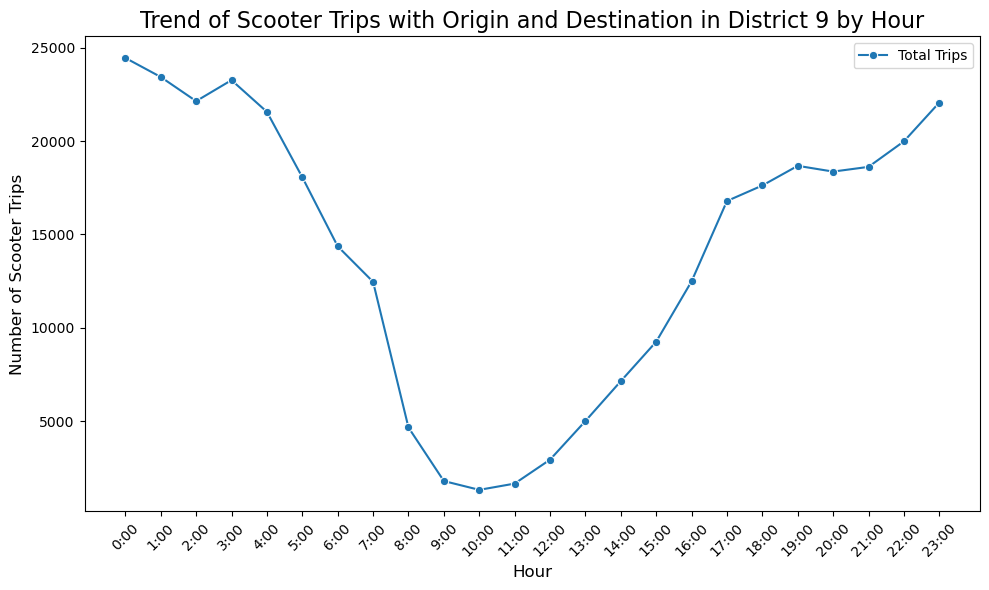

In [194]:
# Group by 'Vehicle Type', 'Hour', 'Council District (Start)', and 'Council District (End)'
# and count the number of trips
total_trips = df.groupby(['Vehicle Type', 'Hour', 'Council District (Start)', 'Council District (End)'], as_index=False).size().reset_index()
total_trips = total_trips.rename(columns={'size': 'Total Trips'})

# Filter for Vehicle Type = 'scooter' and Council District 9
scooter9_data = total_trips[(total_trips['Vehicle Type'] == 'scooter') & 
                             (total_trips['Council District (Start)'] == 9) & 
                             (total_trips['Council District (End)'] == 9)]

# Check if the filtered data is empty
if scooter9_data.empty:
    print("No data available for scooters in Council District 9")
else:
    # Create the pivot table for plotting
    pivot_data = scooter9_data.pivot_table(index='Hour', values='Total Trips', aggfunc='sum')

    # Sort the data by hour
    pivot_data.index = pd.to_numeric(pivot_data.index, errors='coerce')
    pivot_data = pivot_data.sort_index()

    # Plot the trend using a line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=pivot_data, dashes=False, markers='o')

    # Add titles and labels
    plt.title('Trend of Scooter Trips with Origin and Destination in District 9 by Hour', fontsize=16)
    plt.xlabel('Hour', fontsize=12)
    plt.ylabel('Number of Scooter Trips', fontsize=12)

    # Set the x-axis to show all hours (0-23)
    plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(0, 24)], rotation=45)

    # Display the plot
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

In [101]:
pip install geopandas shapely

Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [105]:
filename2 = r'/Users/amiryarmohamadi/Academic/Polito/Transport innovation for a sustainable, inclusive and smart mobility/Projects/Data Exercises/EX1 and 2 AMIR/Boundaries__City_of_Austin_Council_Districts_20241212.csv'
df_distc = pd.read_csv(filename2, on_bad_lines ='warn', sep=',') 
df_distc.head(5)
# Convert 'the_geom' in wards_chicago from WKT(Well Known text) to shapely objects
# 'the_geom' column contains MULTIPOLYGON data in text format
df_distc['the_geom'] = df_distc['the_geom'].apply(wkt.loads)
Distc_gdf = gpd.GeoDataFrame(df_distc, geometry='the_geom')

# Calculation the centroid for each district
Distc_gdf['centroid'] = Distc_gdf['the_geom'].centroid
Distc_gdf['District Number'] = Distc_gdf['District Number'].astype(int)
# Extract Centroid coordinates (latitude and longitude)
Distc_gdf['latitude'] = Distc_gdf['centroid'].y
Distc_gdf['longitude'] = Distc_gdf['centroid'].x

print(Distc_gdf[['District Number', 'latitude', 'longitude']])

   District Number   latitude  longitude
0                5  30.181667 -97.806339
1                4  30.347734 -97.700923
2               10  30.367954 -97.816948
3                2  30.179895 -97.695765
4                7  30.398926 -97.706624
5                1  30.319027 -97.634557
6                6  30.457668 -97.770875
7                3  30.236663 -97.722178
8                8  30.224538 -97.865350
9                9  30.281419 -97.735397


In [107]:
import folium
from folium import plugins

In [109]:
NoCarMoped_df_cleaned = NoCarMoped_filtered[
    (NoCarMoped_filtered['Council District (Start)'] != 0) & 
    (NoCarMoped_filtered['Council District (End)'] != 0)
]

NoCarMoped_df_cleaned = NoCarMoped_df_cleaned[
    (NoCarMoped_df_cleaned['Month'] == '9') & (NoCarMoped_df_cleaned['Hour'] == 0)
]

OD_matrix_cleaned = (
    NoCarMoped_df_cleaned.assign(count=1)
    .pivot_table(index="Council District (Start)", columns="Council District (End)",
                 values="count", aggfunc="count")
    .fillna(0)
    .astype(int)
)

# Check if "Council District (Start)" is in the pivoted DataFrame
if "Council District (Start)" in OD_matrix_cleaned.index.names:
    OD_matrix_cleaned = OD_matrix_cleaned.sort_index()

print(OD_matrix_cleaned)


Council District (End)     1   2     3   4    5   7   8      9   10
Council District (Start)                                           
1                         433   0   148   0   19   0   5    597   4
2                           0   6     5   0    1   0   0      0   0
3                         100   9  1302   0    8   0   0    766   0
4                           1   0     0   9    0   4   1      3   0
5                           9   0    24   0  400   0  29    297   1
7                           0   0     0   2    0   7   0      7   0
8                           1   0     2   0   43   0  64     34   0
9                         471   0   771  11  307   4  30  11114  22
10                          0   0     1   0    0   4   0     12  11


In [111]:
# بررسی تطابق شناسه‌های districts و OD_matrix_cleaned
print("Districts: ", Distc_gdf['District Number'].values)
print("OD_matrix_start: ", OD_matrix_cleaned.index.values)
print("OD_matrix_end: ", OD_matrix_cleaned.columns.values)


Districts:  [ 5  4 10  2  7  1  6  3  8  9]
OD_matrix_start:  [ 1  2  3  4  5  7  8  9 10]
OD_matrix_end:  [ 1  2  3  4  5  7  8  9 10]


In [145]:
import folium
from folium import plugins

# اطمینان از وجود داده‌ها
if Distc_gdf.empty or OD_matrix_cleaned.empty:
    raise ValueError("Error: Districts or OD Matrix is empty. Please check the input data.")

# Map center
map_center = [30.2672, -97.7431]  # Austin, TX
m = folium.Map(location=map_center, zoom_start=11)

# Add Districts points on the map with numbers as text
for idx, row in Distc_gdf.iterrows(): # Draw a small circle in the center of each district
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,  #circle dimention
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(m)

# Add district number text to the map
    folium.map.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 24px; color: black; font-weight: bold;">{row['District Number']}</div>"""
        )
    ).add_to(m)

# Flow Lines
for start_district in OD_matrix_cleaned.index:
    for end_district in OD_matrix_cleaned.columns:
        flow_count = OD_matrix_cleaned.loc[start_district, end_district]
        
        if flow_count > 0:
            # start and end districts
            start_data = Distc_gdf[Distc_gdf['District Number'] == start_district]
            end_data = Distc_gdf[Distc_gdf['District Number'] == end_district]
            
            if not start_data.empty and not end_data.empty:
                start_lat = start_data.iloc[0]['latitude']
                start_lon = start_data.iloc[0]['longitude']
                end_lat = end_data.iloc[0]['latitude']
                end_lon = end_data.iloc[0]['longitude']
                
                # Adjusting thickness and color based on current intensity
                line_thickness = max(1, flow_count / 300)  # تنظیم ضخامت با توجه به شدت جریان
                line_color = 'green' if flow_count < 100 else 'blue' if flow_count > 500 else 'red'  # رنگ با توجه به بازه جریان
                
                # drowing the flow lines
                folium.PolyLine(
                    locations=[(start_lat, start_lon), (end_lat, end_lon)],
                    color=line_color,
                    weight=line_thickness,
                    opacity=50
                ).add_to(m)

from IPython.display import display
display(m)

In [123]:
# OD matrix - 2nd method
# Group by two different columns
vehicle_type_groups_3d = df.groupby(["Council District (Start)",
                                     "Council District (End)"]).size()
# reset index to change columns used for grouby from 'index' to 'column'
vehicle_type_groups_3d_df = vehicle_type_groups_3d.reset_index()
# Change column name for the count column
vehicle_type_groups_3d_df = vehicle_type_groups_3d_df.rename(columns={0: "Count"},
                                                             errors="raise")
vehicle_type_groups_3d_df

,Council District (Start),Council District (End),Count
0,0,0,1006
1,0,2,3
2,0,3,4
3,0,5,8
4,0,8,6
...,...,...,...
84,10,6,1
85,10,7,72
86,10,8,21
87,10,9,626


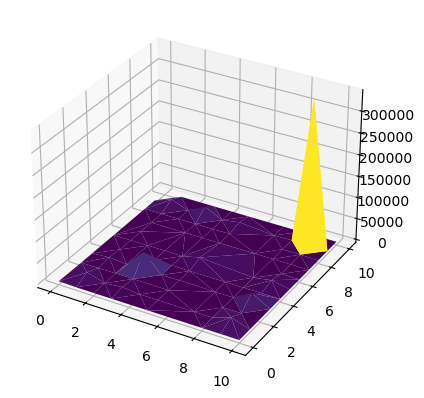

In [310]:
#Plots in 3D
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_trisurf(vehicle_type_groups_3d_df["Council District (Start)"], 
                vehicle_type_groups_3d_df["Council District (End)"], 
                vehicle_type_groups_3d_df["Count"], 
                cmap ='viridis',
                linewidths = 0.2);

#ax.plot_surface(vehicle_type_groups_3d_df["Council District (Start)"],
 #               vehicle_type_groups_3d_df["Council District (End)"],
   #             vehicle_type_groups_3d_df["Count"],
      #          rstride=1, cstride=1,cmap='viridis', edgecolor='none')
#ax.set_title('surface');

#ax = plt.axes(projection ='3d')
#ax.scatter(vehicle_type_groups_3d_df["Council District (Start)"],
#vehicle_type_groups_3d_df["Council District (End)"], 
#vehicle_type_groups_3d_df["Count"], 
#c = vehicle_type_groups_3d_df["Count"], 
#cmap ='viridis', linewidth = 0.25);

In [312]:
import numpy as np
from scipy import stats

In [314]:
# Removing outliers using z-score
#The z-score is a measure of how many (3) standard deviations an element is from the mean of the dataset. 
VT_G_3d_df_no_outliers = vehicle_type_groups_3d_df[(np.abs(stats.zscore(vehicle_type_groups_3d_df['Count'])) < 3)]

In [316]:
vehicle_type_groups_3d_df

,Council District (Start),Council District (End),Count
0,0,0,1063
1,0,2,3
2,0,3,4
3,0,5,9
4,0,8,6
...,...,...,...
84,10,6,1
85,10,7,72
86,10,8,21
87,10,9,628


In [318]:
VT_G_3d_df_no_outliers

,Council District (Start),Council District (End),Count
0,0,0,1063
1,0,2,3
2,0,3,4
3,0,5,9
4,0,8,6
...,...,...,...
84,10,6,1
85,10,7,72
86,10,8,21
87,10,9,628


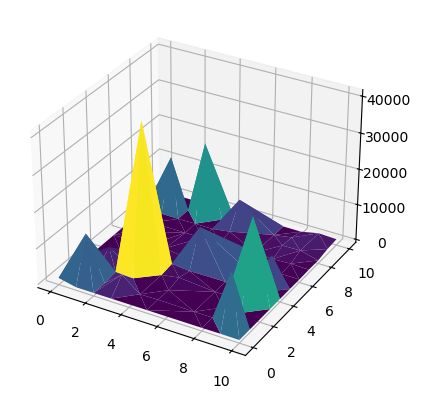

In [320]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(VT_G_3d_df_no_outliers["Council District (Start)"], 
                VT_G_3d_df_no_outliers["Council District (End)"], 
                VT_G_3d_df_no_outliers["Count"], 
                cmap ='viridis',
                linewidths = 0.2);

# Also check seaborn library for heatmaps in general

# Explore the features in Folium and Plotly libraries to plot heatmap data using maps.
